In [3]:
import pandas as pd

df = pd.read_csv("Sample-Superstore.csv",encoding='ISO-8859-1')
print(df.head())
print(df.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


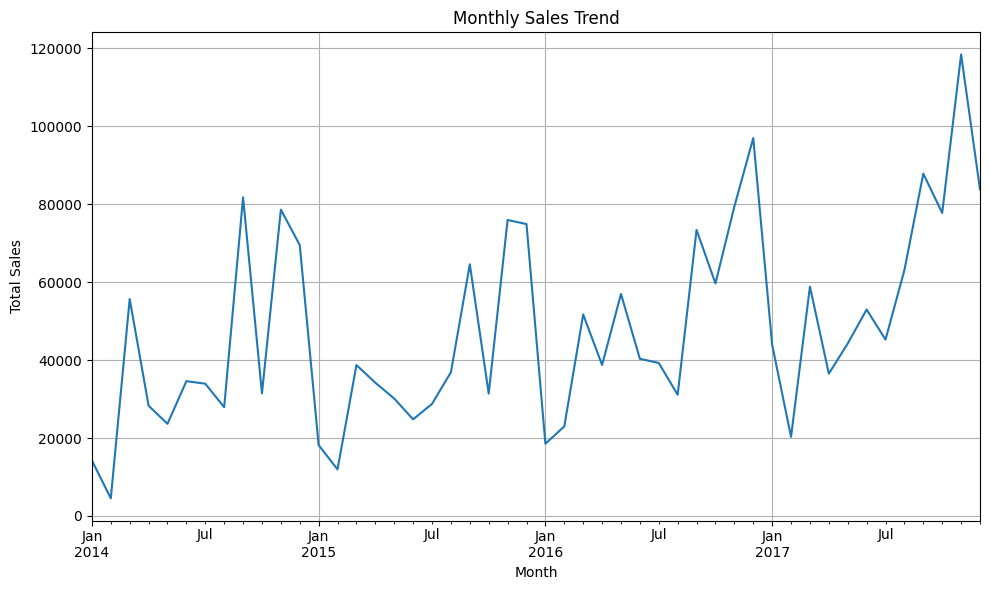

In [6]:
# First, make sure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Then, set up the resample
df_monthly = df.resample('M', on='Order Date')[['Sales']].sum()

# Now plot the monthly sales trend
import matplotlib.pyplot as plt

df_monthly['Sales'].plot(title='Monthly Sales Trend', figsize=(10,6))
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Region', ylabel='Sales'>

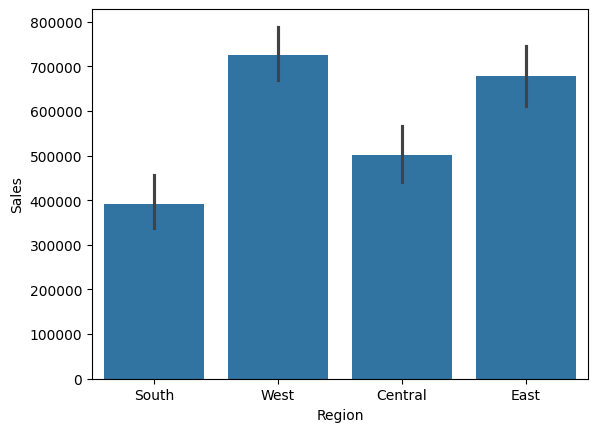

In [7]:
import seaborn as sns
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)


<Axes: xlabel='Region', ylabel='Sales'>

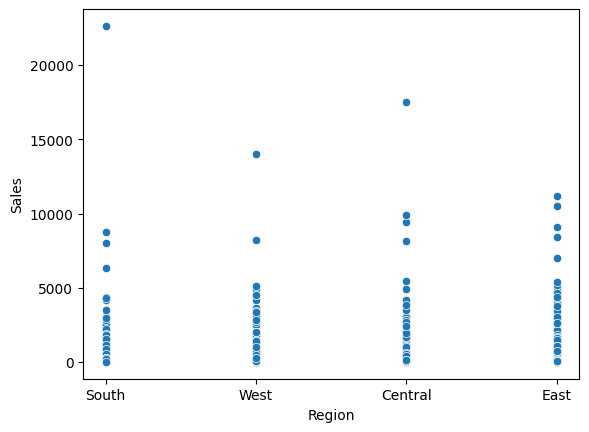

In [10]:
sns.scatterplot(data=df, x='Region', y='Sales')


In [11]:
pip install streamlit



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.6 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.6 MB 1.4 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.6 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.6 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.6 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.6 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.6 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.6 MB 1.0 MB/s eta 0:00:07
   ---------- ----------------------------- 2.4/8.6 MB 1.1 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.6 MB 1.1 MB/s eta 0:00:06
   ------------ ----------------

In [12]:
import streamlit as st

# Title
st.title("📊 Business Insights Dashboard - Superstore Sales")

# Sidebar Filters
region = st.sidebar.multiselect("Select Region", options=df['Region'].unique(), default=df['Region'].unique())
category = st.sidebar.multiselect("Select Category", options=df['Category'].unique(), default=df['Category'].unique())

# Filter Data
filtered_df = df[df['Region'].isin(region) & df['Category'].isin(category)]

# KPIs
total_sales = filtered_df['Sales'].sum()
avg_order_value = filtered_df['Sales'].mean()
growth_rate = (df[df['Order Date'].dt.year == 2017]['Sales'].sum() - df[df['Order Date'].dt.year == 2016]['Sales'].sum()) / df[df['Order Date'].dt.year == 2016]['Sales'].sum()

st.metric("💰 Total Sales", f"${total_sales:,.2f}")
st.metric("📦 Avg Order Value", f"${avg_order_value:,.2f}")
st.metric("📈 Growth Rate", f"{growth_rate*100:.2f}%")

# Visuals
st.subheader("📅 Monthly Sales Trend")
monthly_sales = filtered_df.resample('M', on='Order Date').sum()
st.line_chart(monthly_sales['Sales'])

st.subheader("🌎 Sales by Region")
region_sales = filtered_df.groupby('Region')['Sales'].sum()
st.bar_chart(region_sales)

st.subheader("📂 Sales by Product Category")
category_sales = filtered_df.groupby('Category')['Sales'].sum()
st.bar_chart(category_sales)

# Summary
st.markdown("### 🔍 Key Insights")
top_region = region_sales.idxmax()
top_category = category_sales.idxmax()
st.write(f"- **Top Performing Region:** {top_region}")
st.write(f"- **Top Selling Category:** {top_category}")


2025-05-16 16:57:43.977 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:44.521 
  command:

    streamlit run c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-16 16:57:44.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:44.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:44.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:44.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:44.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 16:57:4

TypeError: datetime64 type does not support sum operations

In [13]:
pip install pandas dash plotly


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 465.6 kB/s eta 0:00:16
   -- ------------------------------------- 0.5/7.9 MB 465.6 kB/s eta 0:00:16
   -- ----------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


df = pd.read_csv('Sample-Superstore.csv', encoding='latin1')  # use latin1 to fix unicode error
df['Order Date'] = pd.to_datetime(df['Order Date'])


app = dash.Dash(__name__)
app.title = "Sales Dashboard"


app.layout = html.Div([
    html.H1("Interactive Sales Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Div([
            html.Label('Select Region:'),
            dcc.Dropdown(
                id='region-filter',
                options=[{'label': r, 'value': r} for r in df['Region'].unique()],
                value=df['Region'].unique().tolist(),
                multi=True
            )
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Div([
            html.Label('Select Category:'),
            dcc.Checklist(
                id='category-filter',
                options=[{'label': c, 'value': c} for c in df['Category'].unique()],
                value=df['Category'].unique().tolist(),
                inline=True
            )
        ], style={'width': '40%', 'display': 'inline-block'}),

        html.Div([
            html.Label('Select Date Range:'),
            dcc.DatePickerRange(
                id='date-range',
                min_date_allowed=df['Order Date'].min(),
                max_date_allowed=df['Order Date'].max(),
                start_date=df['Order Date'].min(),
                end_date=df['Order Date'].max()
            )
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'right'}),
    ], style={'marginBottom': '20px'}),

    html.Div([
        html.Div(id='kpi-1', style={'width': '33%', 'display': 'inline-block', 'textAlign': 'center'}),
        html.Div(id='kpi-2', style={'width': '33%', 'display': 'inline-block', 'textAlign': 'center'}),
        html.Div(id='kpi-3', style={'width': '33%', 'display': 'inline-block', 'textAlign': 'center'}),
    ], style={'marginBottom': '30px'}),

    dcc.Graph(id='sales-trend'),
    dcc.Graph(id='sales-by-region'),
    dcc.Graph(id='sales-by-category'),
])


@app.callback(
    [
        Output('sales-trend', 'figure'),
        Output('sales-by-region', 'figure'),
        Output('sales-by-category', 'figure'),
        Output('kpi-1', 'children'),
        Output('kpi-2', 'children'),
        Output('kpi-3', 'children')
    ],
    [
        Input('region-filter', 'value'),
        Input('category-filter', 'value'),
        Input('date-range', 'start_date'),
        Input('date-range', 'end_date'),
    ]
)
def update_dashboard(selected_regions, selected_categories, start_date, end_date):
    filtered_df = df[
        (df['Region'].isin(selected_regions)) &
        (df['Category'].isin(selected_categories)) &
        (df['Order Date'] >= pd.to_datetime(start_date)) &
        (df['Order Date'] <= pd.to_datetime(end_date))
    ]


    total_sales = filtered_df['Sales'].sum()
    avg_order_value = filtered_df['Sales'].mean()
    monthly_sales = filtered_df.set_index('Order Date').resample('M')['Sales'].sum()
    growth = (monthly_sales[-1] - monthly_sales[-2]) / monthly_sales[-2] * 100 if len(monthly_sales) > 1 else 0


    trend_fig = px.line(monthly_sales, x=monthly_sales.index, y='Sales',
                        title='Monthly Sales Trend')


    region_fig = px.bar(filtered_df.groupby('Region')['Sales'].sum().reset_index(),
                        x='Region', y='Sales', title='Sales by Region')


    cat_fig = px.pie(filtered_df, names='Category', values='Sales', title='Sales by Category')

    return (
        trend_fig,
        region_fig,
        cat_fig,
        html.H4(f"Total Sales: ₹{total_sales:,.2f}"),
        html.H4(f"Average Order Value: ₹{avg_order_value:,.2f}"),
        html.H4(f"Growth Rate (last month): {growth:.2f}%")
    )


if __name__ == '__main__':
    app.run(debug=True)
